In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Runge-Kutta method -- Code from HW 3

def k1(x,y,h):
    return h*f(x=x,y=y)

def k2(x,y,h):
    K1 = k1(x=x,y=y,h=h)
    return h*f(x=x+h/2,y=y+K1/2)

def k3(x,y,h):
    K2 = k2(x=x,y=y,h=h)
    return h*f(x=x+h/2,y=y+K2/2)

def k4(x,y,h):
    K3 = k2(x=x,y=y,h=h)
    return h*f(x=x+h,y=y+K3)

def RK4(x,y,h):
    '''
    Runs 4xh order Runge-Kuxxa mexhod to find y(x') at x'=(x+h) given x, y(x), and h.
    '''
    return y + k1(x=x,y=y,h=h)/6 + k2(x=x,y=y,h=h)/3 \
             + k3(x=x,y=y,h=h)/3 + k4(x=x,y=y,h=h)/6
    

In [105]:
B=1
P=1
R=1
D=1

def dfdx(X):
    f = np.empty((2,))
    f[0] = (B-P*X[1])*X[0]
    f[1] = (R*X[0]-D)*X[1]
    return f

def f(x,y):
    Xp = dfdx(X=y)
#     print(x,y,Xp)
    return Xp

In [142]:
t0=0
x0=np.array([0.3,0.2])
h=.1
N = 300

t=t0
X = np.empty((N+1,2))
X[0] = x0

for i in range(N):
    X[i+1] = RK4(x=t,y=X[i],h=h)
    t += h


Text(0, 0.5, 'Population')

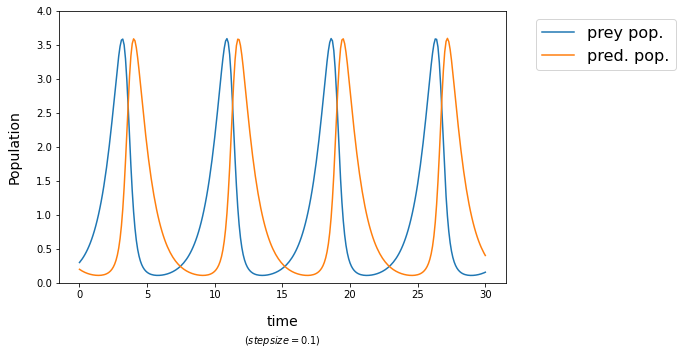

In [170]:
fig,ax = plt.subplots(1,figsize=(8,5))
line = ax.plot(np.arange(N+1)*h,X)
ax.legend(line,['prey pop.', 'pred. pop.'], fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim([0,4])
ax.set_xlabel('time\n' r'$_{(stepsize=0.1)}$', fontsize=14,labelpad=15)
ax.set_ylabel('Population', fontsize=14,labelpad=15)

In [85]:
X

array([[0.30241174, 0.19860728],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [59]:
from scipy.integrate import RK45 as spRK4